In [2]:
import polars as pl
from ml.data import load_bike, load_penguins, load_spy_sample
from ml.utils import get_corr

"""

https://github.com/xbeat/Machine-Learning/blob/main/Understanding%20Mutual%20Information%20in%20Machine%20Learning%20with%20Python.md
> While correlation measures linear relationships, Mutual Information captures both linear and non-linear dependencies between variables. This makes MI a more general measure of dependency.
"""

'\n\nhttps://github.com/xbeat/Machine-Learning/blob/main/Understanding%20Mutual%20Information%20in%20Machine%20Learning%20with%20Python.md\n> While correlation measures linear relationships, Mutual Information captures both linear and non-linear dependencies between variables. This makes MI a more general measure of dependency.\n'

In [3]:
bike = load_bike()
penguin = load_penguins()

In [6]:
get_corr(penguin.drop_nulls())

Variable 1,Variable 2,Correlation
str,str,f64
"""body_mass_g""","""flipper_length_mm""",0.872979
"""flipper_length_mm""","""bill_length_mm""",0.653096
"""body_mass_g""","""bill_length_mm""",0.589451
"""bill_depth_mm""","""bill_length_mm""",-0.228626
"""bill_depth_mm""","""body_mass_g""",-0.472016
"""flipper_length_mm""","""bill_depth_mm""",-0.577792


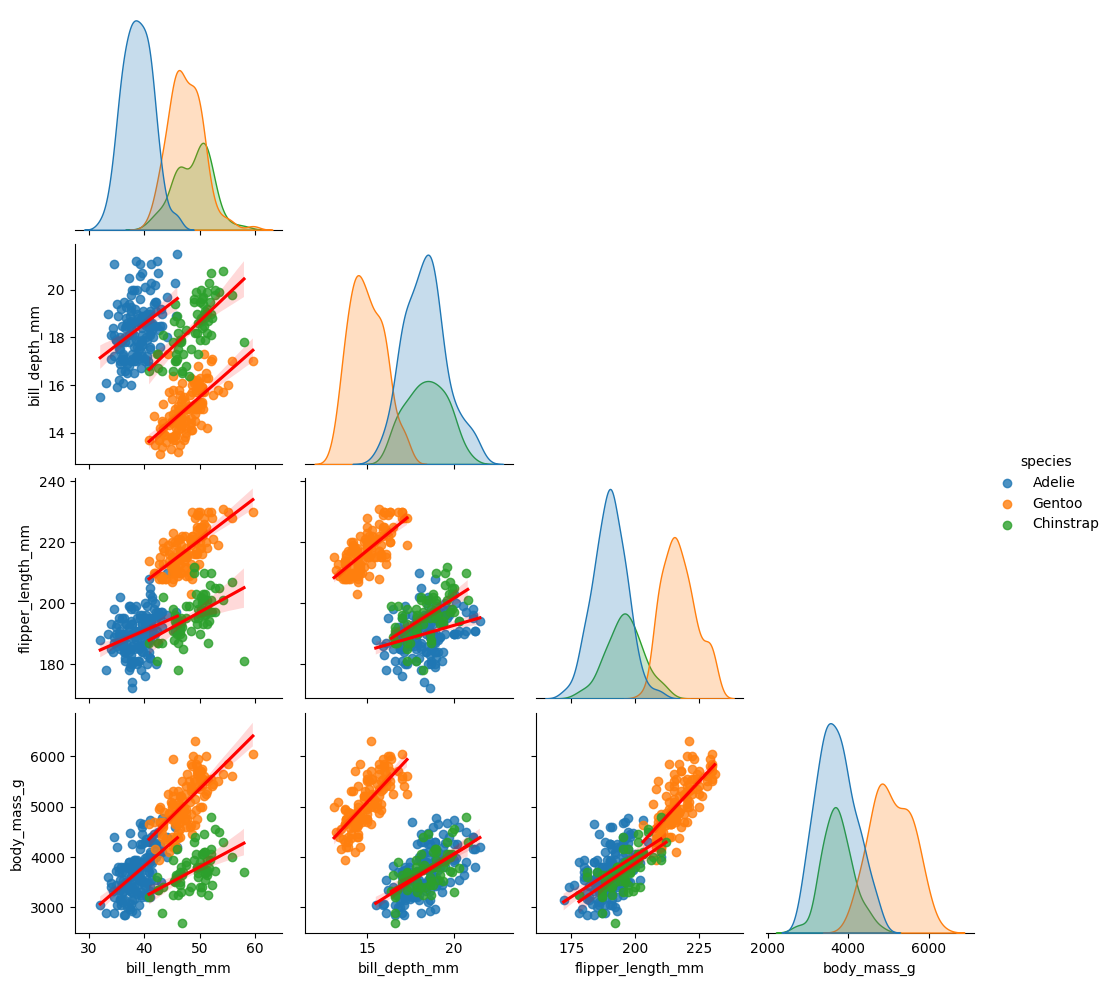

In [7]:
import seaborn as sns

sns.pairplot(penguin.to_pandas(), hue='species', kind='reg', plot_kws={'line_kws':{'color':'red'}}, corner=True)

In [ ]:
import numpy as np
# Load the data
data = np.array([1, 2, 3, 4, 5, 100])

# Calculate the IQR
IQR = np.percentile(data, 75) - np.percentile(data, 25)

# Calculate the bin width using the Freedman-Diaconis rule
bin_width_fd = 2 * IQR / np.power(len(data), 1/3)

# The Freedman-Diaconis rule gives a formula for the width of the bins.
# The function gives a formula for the number of bins.

print(bin_width_fd)

# plt.hist(data, bins=np.arange(min(data), max(data), bin_width_fd))
len(np.arange(min(data), max(data), bin_width_fd))


In [ ]:
# https://github.com/xbeat/Machine-Learning/blob/main/Understanding%20Mutual%20Information%20in%20Machine%20Learning%20with%20Python.md

from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = bike.select(pl.exclude('cnt')).to_pandas()
df_encoded = df.apply(lambda col: pd.factorize(col)[0])


# Calculate pairwise Mutual Information
variables = df_encoded.columns
n_vars = len(variables)
mi_matrix = np.zeros((n_vars, n_vars))


for i in range(n_vars):
    for j in range(n_vars):
        mi_matrix[i, j] = normalized_mutual_info_score(df_encoded.iloc[:, i], df_encoded.iloc[:, j])

# Visualize the MI matrix
plt.figure(figsize=(10, 8))
plt.imshow(mi_matrix, cmap='viridis')
plt.colorbar(label='Mutual Information')
plt.xticks(range(n_vars), variables, rotation=45)
plt.yticks(range(n_vars), variables)
plt.title("Climate Variables Mutual Information Matrix")
plt.tight_layout()
#plt.show()

# Print MI values
for i in range(n_vars):
    for j in range(i+1, n_vars):
        print(f"MI between {variables[i]} and {variables[j]}: {mi_matrix[i, j]:.4f}")

mi_matrix

In [ ]:
import pandas as pd
import numpy as np

# https://medium.com/latinxinai/computing-mutual-information-matrix-with-python-6ced9169bcb1

def joint_entropies(data, nbins=None):
    n_variables = data.shape[-1]
    n_samples = data.shape[0]
    if nbins == None:
        nbins = int((n_samples/5)**.5)
    histograms2d = np.zeros((n_variables, n_variables, nbins, nbins))
    for i in range(n_variables):
        for j in range(n_variables):
            histograms2d[i,j] = np.histogram2d(data[:,i], data[:,j], bins=nbins)[0]
    probs = histograms2d / len(data) + 1e-100
    joint_entropies = -(probs * np.log2(probs)).sum((2,3))
    return joint_entropies

def mutual_info_matrix(df, nbins=None, normalized=True):
    data = df.to_numpy()
    n_variables = data.shape[-1]
    j_entropies = joint_entropies(data, nbins)
    entropies = j_entropies.diagonal()
    entropies_tile = np.tile(entropies, (n_variables, 1))
    sum_entropies = entropies_tile + entropies_tile.T
    mi_matrix = sum_entropies - j_entropies
    if normalized:
        mi_matrix = mi_matrix * 2 / sum_entropies
    return pd.DataFrame(mi_matrix, index=df.columns, columns=df.columns)

df = bike.select(pl.exclude('cnt')).to_pandas()
df_encoded = df.apply(lambda col: pd.factorize(col)[0])
mutual_info_matrix(df_encoded, nbins=5, normalized=True)

In [ ]:
# ChatGPT

import pandas as pd
import numpy as np
from sklearn.metrics import normalized_mutual_info_score
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame with categorical variables
df = pd.DataFrame({
    'A': np.random.choice(['a', 'b', 'c'], size=100),
    'B': np.random.choice(['x', 'y', 'z'], size=100),
    'C': np.random.choice(['cat', 'dog'], size=100),
    'D': np.random.choice(['red', 'blue'], size=100)
})

df = bike.select(pl.exclude('cnt')).to_pandas()

# Encode categorical variables to integers
df_encoded = df.apply(lambda col: pd.factorize(col)[0])

# Compute the NMI matrix
columns = df.columns
n = len(columns)
nmi_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        nmi_matrix[i, j] = normalized_mutual_info_score(df_encoded.iloc[:, i], df_encoded.iloc[:, j])

# Convert to DataFrame for readability and plotting
nmi_df = pd.DataFrame(nmi_matrix, index=columns, columns=columns)

# Display as heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(nmi_df, annot=True, cmap='Blues')
plt.title("Normalized Mutual Information Matrix")
plt.show()

